In [3]:
pip install matplotlib

     ---------------------------------------- 0.0/114.6 kB ? eta -:--:--
     -------------------------------------- 114.6/114.6 kB 3.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---- ----------------------------------- 1.0/8.1 MB 20.3 MB/s eta 0:00:01
   ---------- ----------------------------- 2.1/8.1 MB 26.3 MB/s eta 0:00:01
   --------------- ------------------------ 3.1/8.1 MB 24.6 MB/s eta 0:00:01
   ------------------- -------------------- 4.1/8.1 MB 23.5 MB/s eta 0:00:01
   ------------------------ --------------- 5.0/8.1 MB 23.0 MB/s eta 0:00:01
   ------------------------------ --------- 6.1/8.1 MB 22.9 MB/s eta 0:00:01
   ---------------------------------- ----- 7.1/8.1 MB 22.5 MB/s eta 0:00:01
   ---------------------------------------  8.1/8.1 MB 22.5 MB/s eta 0:00:01
   ---------------------------------------  8.1/8.1 MB 22.5 MB/s eta 0:00:01
   ---------------------------------------- 8.1/8.1 MB 19.2 MB/s eta 0:00:00
   -----


[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: C:\Users\benja\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Let us start with the 1D SSH Model

In [30]:
#first case with nearest neighbor hopping

# The indices correspond to R = [-1, 0, 1]
Haa = np.array([0.0, 0.1, 0.0])
Hbb = np.array([0.0, 0.1, 0.0])
Hab = np.array([0.7, 0.4, 0.0])
Hba = np.array([0.0, 0.4, 0.7])

# Each row represents a matrix element type [aa, ab, ba, bb]
# Each column represents a unit cell index R = [-1, 0, 1]
H_r = np.array([Haa, Hab, Hba, Hbb])

In [24]:
def get_H_k(k):
    R = np.array([-1, 0, 1])
    phase = np.exp(1j * k * R)
    
    H_k = np.zeros((2, 2), dtype=complex)
    
    H_k[0, 0] = np.sum(Haa * phase)  # Haa(k)
    H_k[0, 1] = np.sum(Hab * phase)  # Hbb(k)
    H_k[1, 0] = np.sum(Hba * phase)  # Hba(k)
    H_k[1, 1] = np.sum(Hbb * phase)  # Hbb(k)
    
    return H_k

In [25]:
#JUST TESTING TO SEE IF IT MAKES SENSE
test_k_points = [-np.pi, 0, np.pi]
for k in (test_k_points):
    H = get_H_k(k)
    print(f"\n{k}")
    print(H)
    
    is_hermitian = np.allclose(H, H.conj().T)
    if is_hermitian:
        print("The Hamiltonian is Hermitian.")
    else:
        print("The Hamiltonian is NOT Hermitian.")


-3.141592653589793
[[ 0.1+0.00000000e+00j -0.3+8.57252759e-17j]
 [-0.3-8.57252759e-17j  0.1+0.00000000e+00j]]
The Hamiltonian is Hermitian.

0
[[0.1+0.j 1.1+0.j]
 [1.1+0.j 0.1+0.j]]
The Hamiltonian is Hermitian.

3.141592653589793
[[ 0.1+0.00000000e+00j -0.3-8.57252759e-17j]
 [-0.3+8.57252759e-17j  0.1+0.00000000e+00j]]
The Hamiltonian is Hermitian.


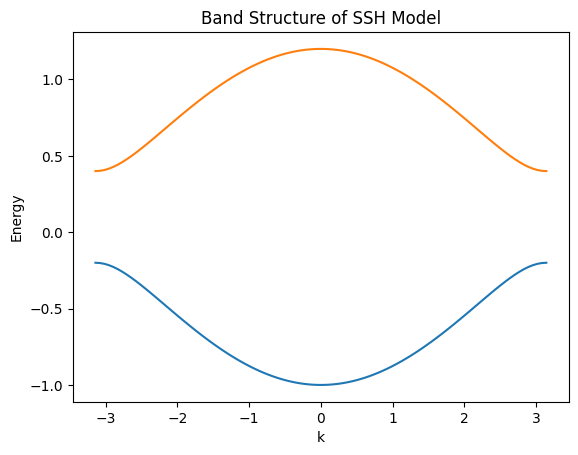

In [32]:
def plot_band_structure(k_points):
    upper_eigenvalues = []
    lower_eigenvalues = []
    for k in k_points:
        H_k = get_H_k(k)
        lower_evals, upper_evals = np.linalg.eigvalsh(H_k)
        lower_eigenvalues.append(lower_evals)
        upper_eigenvalues.append(upper_evals)

    plt.plot(k_points, lower_eigenvalues, label='Lower Band')
    plt.plot(k_points, upper_eigenvalues, label='Upper Band')
    plt.xlabel('k')
    plt.ylabel('Energy')
    plt.title('Band Structure of SSH Model')
    plt.show()

#first case with nearest neighbor hopping
# The indices correspond to R = [-1, 0, 1]
Haa = np.array([0.0, 0.1, 0.0])
Hbb = np.array([0.0, 0.1, 0.0])
Hab = np.array([0.7, 0.4, 0.0])
Hba = np.array([0.0, 0.4, 0.7])
H_r = np.array([Haa, Hab, Hba, Hbb])
k_points = np.linspace(-np.pi, np.pi, 100)
plot_band_structure(k_points)

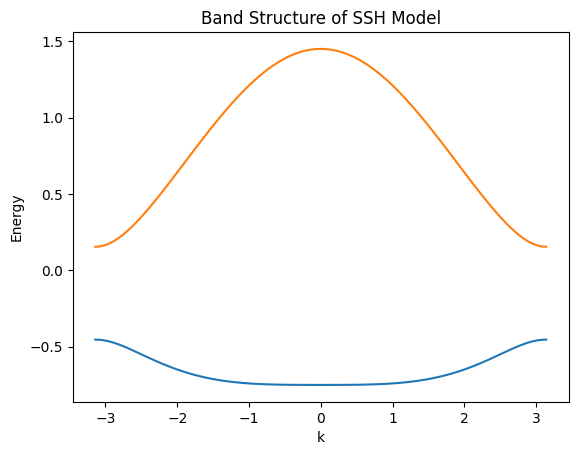

In [34]:
#now let us add in nearest neighbour hopping

# The indices correspond to R = [-1, 0, 1]
next_nearest_hopping_aa = 0.2
next_nearest_hopping_bb = 0.3

Haa = np.array([next_nearest_hopping_aa, 0.1, 0.0])
Hbb = np.array([0.0, 0.1, next_nearest_hopping_bb])
Hab = np.array([0.7, 0.4, 0.0])
Hba = np.array([0.0, 0.4, 0.7])

# Each row represents a matrix element type [aa, ab, ba, bb]
# Each column represents a unit cell index R = [-1, 0, 1]
H_r = np.array([Haa, Hab, Hba, Hbb])

k_points = np.linspace(-np.pi, np.pi, 100)
plot_band_structure(k_points)

# Now Let us try a 2D Model

In [ ]:
#first case with nearest neighbor hopping

# The indices correspond to R = [-1, 0, 1]
Haa = np.array([0.0, 0.1, 0.0])
Hbb = np.array([0.0, 0.1, 0.0])
Hab = np.array([0.7, 0.4, 0.0])
Hba = np.array([0.0, 0.4, 0.7])


H_r = np.array([Haa, Hab, Hba, Hbb])